# Chapter 9: Topic Analysis

## Supervised Approach

First, let's import the libraries that we are going to use in this notebook:

In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np

Now, let's define a method to load *training* and *test* subsets using a predefined list of categories. Note that following options are also available:
- you can use `load_dataset('all', categories)` to load the whole dataset
- you can use `load_dataset('train', None)` to load the set of all topics

In [2]:
def load_dataset(a_set, cats):
    dataset = fetch_20newsgroups(subset=a_set, categories=cats,
                          remove=('headers', 'footers', 'quotes'),
                          shuffle=True)
    return dataset

In [3]:
categories = ["comp.windows.x", "misc.forsale", "rec.autos", "rec.motorcycles", "rec.sport.baseball"]
categories += ["rec.sport.hockey", "sci.crypt", "sci.med", "sci.space", "talk.politics.mideast"]

newsgroups_train = load_dataset('train', categories)
newsgroups_test = load_dataset('test', categories)

Let's check our uploaded data subsets:

In [4]:
def check_data(dataset):
    print(list(dataset.target_names))
    print(dataset.filenames.shape)
    print(dataset.target.shape)
    if dataset.filenames.shape[0]==dataset.target.shape[0]:
        print("Equal sizes for data and targets")
    print(dataset.filenames[0])
    print(dataset.data[0])
    print(dataset.target[:10])

In [5]:
check_data(newsgroups_train)
print("\n***\n")
check_data(newsgroups_test)

['comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'sci.space', 'talk.politics.mideast']
(5913,)
(5913,)
Equal sizes for data and targets
/Users/ekaterinakochmar/scikit_learn_data/20news_home/20news-bydate-train/rec.sport.baseball/102665
I have posted the logos of the NL East teams to alt.binaries.pictures.misc 
 Hopefully, I'll finish the series up next week with the NL West.

 Darren

[4 3 9 7 4 3 0 5 7 8]

***

['comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'sci.space', 'talk.politics.mideast']
(3937,)
(3937,)
Equal sizes for data and targets
/Users/ekaterinakochmar/scikit_learn_data/20news_home/20news-bydate-test/misc.forsale/76785
As the title says. I would like to sell my Star LV2010 9 pin printer.
Its a narrow colum dot matrix, supports both parallel and serial
interfacing, prints at 200 characters per second, has

Now let's create word vectors based on the content of the posts:

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')

def text2vec(vectorizer, train_set, test_set):
    vectors_train = vectorizer.fit_transform(train_set.data)
    vectors_test = vectorizer.transform(test_set.data)
    return vectors_train, vectors_test

vectors_train, vectors_test = text2vec(vectorizer, newsgroups_train, newsgroups_test)

Let's check how the data looks like now:

In [7]:
print(vectors_train.shape)
print(vectors_test.shape)
print(vectors_train[0])
print(vectorizer.get_feature_names()[33404])

(5913, 52746)
(3937, 52746)
  (0, 15218)	0.31618146678372416
  (0, 50534)	0.20153071455804605
  (0, 50435)	0.1817612919269656
  (0, 42031)	0.1891577831889085
  (0, 20349)	0.2372918776268056
  (0, 29215)	0.14244326085583361
  (0, 24214)	0.23045715683316248
  (0, 31546)	0.21952696479551445
  (0, 36274)	0.23637098993673133
  (0, 9616)	0.2606508810838842
  (0, 6736)	0.23045715683316248
  (0, 46098)	0.18751137951875305
  (0, 17820)	0.1996672692556469
  (0, 33404)	0.47274197987346267
  (0, 29330)	0.32348469409130415
  (0, 36985)	0.1806134526365663
nl


Next, let's apply the Multinomial Naive Bayes classifier:

In [8]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=0.1)
clf.fit(vectors_train, newsgroups_train.target)
predictions = clf.predict(vectors_test)

Finally, let's evaluate the results, extract the most informative terms per topic, and print out and vosialise the confusion matrix:

In [11]:
from sklearn import metrics

def show_top(classifier, categories, vectorizer, n):
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        top = np.argsort(classifier.coef_[i])[-n:]
        print(f'{category}: {" ".join(feature_names[top])}')
        

full_report = metrics.classification_report(newsgroups_test.target, 
                                            predictions, target_names=newsgroups_test.target_names)
print(full_report)
show_top(clf, categories, vectorizer, 10)

                       precision    recall  f1-score   support

       comp.windows.x       0.92      0.90      0.91       395
         misc.forsale       0.88      0.87      0.87       390
            rec.autos       0.83      0.78      0.80       396
      rec.motorcycles       0.85      0.80      0.83       398
   rec.sport.baseball       0.92      0.84      0.88       397
     rec.sport.hockey       0.71      0.94      0.81       399
            sci.crypt       0.82      0.85      0.83       396
              sci.med       0.92      0.82      0.87       396
            sci.space       0.86      0.82      0.84       394
talk.politics.mideast       0.86      0.90      0.88       376

             accuracy                           0.85      3937
            macro avg       0.86      0.85      0.85      3937
         weighted avg       0.86      0.85      0.85      3937

comp.windows.x: program using application windows widget use thanks motif server window
misc.forsale: asking email 

[[355   8   2   2   1   8  12   2   5   0]
 [  3 339  16   9   4  11   2   1   5   0]
 [  0   9 308  25   3  27   7   3   9   5]
 [  2   8  26 320   4  15   9   4   6   4]
 [  3   7   0   2 333  33   4   5   2   8]
 [  1   0   0   2   6 374   8   2   2   4]
 [  9   7   3   3   2  18 335   2   7  10]
 [  2   4   9   5   3  17   7 324  13  12]
 [  9   3   7   2   3  18  11   6 324  11]
 [  2   0   2   7   2   9  13   2   2 337]]


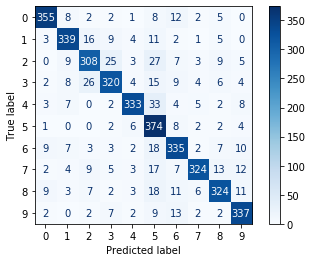

0 comp.windows.x
1 misc.forsale
2 rec.autos
3 rec.motorcycles
4 rec.sport.baseball
5 rec.sport.hockey
6 sci.crypt
7 sci.med
8 sci.space
9 talk.politics.mideast


In [12]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

classifier = clf.fit(vectors_train, newsgroups_train.target)

disp = plot_confusion_matrix(classifier, vectors_test, 
                             newsgroups_test.target,
                             values_format="0.0f",
                             cmap=plt.cm.Blues)
    
print(disp.confusion_matrix)

plt.show()
for i, category in enumerate(newsgroups_train.target_names):
    print(i, category)

# Unsupervised Approach

First, let's prepare the data:

In [51]:
import random
random.seed(42)

all_news = list(zip(newsgroups_train.data, newsgroups_train.target))
all_news += list(zip(newsgroups_test.data, newsgroups_test.target))
random.shuffle(all_news)

all_news_data = [text for (text, label) in all_news]
all_news_labels = [label for (text, label) in all_news]

print("Data:")
print(str(len(all_news_data)) + " posts in "
      + str(np.unique(all_news_labels).shape[0]) + " categories\n")

print("Labels: ")
print(all_news_labels[:10])
num_clusters = np.unique(all_news_labels).shape[0]
print("Assumed number of clusters: " + str(num_clusters))

Data:
9850 posts in 10 categories

Labels: 
[2, 6, 1, 9, 0, 5, 1, 2, 9, 0]
Assumed number of clusters: 10


Since the original dimensionality of the data is prohibitively large to allow for efficient clustering, let's reduce its dimensionality using [`Singular Value Decomposition`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD):

In [46]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

vectorizer = TfidfVectorizer(min_df=2, max_df=0.5,
                             stop_words='english',
                             use_idf=True)

def transform(data, vectorizer, dimensions):
    trans_data = vectorizer.fit_transform(data)
    print("Transformed data contains: " + str(trans_data.shape[0]) +
          " with " + str(trans_data.shape[1]) + " features =>")

    #See more examples here:
    #https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py
    svd = TruncatedSVD(dimensions)
    pipe = make_pipeline(svd, Normalizer(copy=False))
    reduced_data = pipe.fit_transform(trans_data)

    return reduced_data, svd

In [47]:
reduced_data, svd = transform(all_news_data, vectorizer, 300)
print("Reduced data contains: " + str(reduced_data.shape[0]) +
        " with " + str(reduced_data.shape[1]) + " features")

Transformed data contains: 9850 with 33976 features =>
Reduced data contains: 9850 with 300 features


Now, let's cluster the data using [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) algorithm:

In [70]:
from sklearn.cluster import KMeans

def cluster(data, num_clusters):
    km = KMeans(n_clusters=num_clusters, init='k-means++', 
                max_iter=100, random_state=0)
    km.fit(data)
    return km

km = cluster(reduced_data, num_clusters)

And finally evaluate:

In [75]:
def evaluate(km, labels, svd):
    print("Clustering report:\n")
    print(f"* Homogeneity: {str(metrics.homogeneity_score(labels, km.labels_))}")
    print(f"* Completeness: {str(metrics.completeness_score(labels, km.labels_))}")
    print(f"* V-measure: {str(metrics.v_measure_score(labels, km.labels_))}")

    print("\nMost discriminative words per cluster:")
    original_space_centroids = svd.inverse_transform(km.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(num_clusters):
        print("Cluster " + str(i) + ": ")
        cl_terms = ""
        for ind in order_centroids[i, :50]:
            cl_terms += terms[ind] + " "
        print(cl_terms + "\n")

In [76]:
evaluate(km, all_news_labels, svd)

print("\nCategories:")
for i, category in enumerate(newsgroups_train.target_names):
    print("*", category)

Clustering report:

* Homogeneity: 0.4905834160659784
* Completeness: 0.5545553250427578
* V-measure: 0.5206115419058042

Most discriminative words per cluster:
Cluster 0: 
key chip clipper encryption government keys nsa escrow algorithm use des people secure security phone public law crypto don privacy secret encrypted just data enforcement think bit know phones chips message number used using like agencies make wiretap way scheme trust rsa time private court serial fbi does police right 

Cluster 1: 
doctor disease medical msg patients pain don cause cancer know treatment food people like patient gordon drug body good geb candida yeast time skepticism effects banks pitt diet n3jxp dsl cadre chastity intellect health shameful medicine surrender edu ve just does blood effect soon years think use drugs chronic kidney 

Cluster 2: 
game team games year hockey players season play think don win baseball good player teams league like time nhl espn just did hit better fans best know really s